In [73]:
import markovify
# https://github.com/jsvine/markovify

In [74]:
with open('text_newlines.txt') as f:
    text = f.read()

In [75]:
text_model = markovify.NewlineText(text)

In [77]:
for i in range(5):
    print(text_model.make_sentence(), "\n")

Katie, a former professional ice skater, is hired to decorate it — Dave. The deal is off, but Dave convinces Noelle to let the life and rediscovers the true meaning of faith, family and old flame Clay, a local shop keeper, and handsome admirer Deputy Strode. Settling in nicely with her ex-boyfriend Jack, the show’s producer, the magic of Christmas. 

A wealthy and successful career woman gets a taste of small-town life and sets out to impress Victoria, the store’s owner, by creating the best place for a beloved neonatal intensive care unit supervisor, is forced together with Ben to care for a tropical Christmas get delayed when she unexpectedly finds herself drawn to Robert—even as Kip pursues her. 

Erin is planning the town’s Twelve Day Festival, that he might just be the man who is poised to play Scrooge by closing one of his mother’s popular annual Christmas scavenger hunt. 

Two separate stories mesh - in the millions, thanks to a remote town in love with Holly and learns a surpri

In [78]:
for i in range(3):
    print(text_model.make_short_sentence(280))

An out-of-work New York unexpectedly falls in love all those years ago.
A successful businesswoman, Mackenzie, inherits her beloved hometown, however, when the store owner who hosts the tree this Christmas, trying to avoid anything that will prove miracles really do happen.
When architect and Christmas tree lot, she discovers a newfound fondness for the holidays. Eric turns to his widowed father.


In [79]:
for i in range(5):
    print(text_model.make_sentence(max_overlap_total=10),'\n')

World-traveler Harper returns to her late mother’s house, she finds out that his interest is not jeopardized. 

A teenager has his Sitka Spruce tree chosen to be his girlfriend over Christmas so he can get any money. 

As Christina prepares her restaurant for its value, he sees this as the site of its Christmas Eve parade. This year’s audience for the job by Christmas Eve. With the Christmas Comet appears for the paper about the famous family in order to save the school and the unexpected power of love. 

When a driven doctor doesn't get the scoop on the prize of the Blues and dreams of making music again. 

Newly widowed Kathy plans to sell it right before Christmas, which would devastate an entire business around helping clients find the spirit of giving. But Santa Claus, as a fraud. 



In [80]:
for i in range(5):
    print(text_model.make_sentence(max_overlap_ratio=0.5), '\n')

Sisters separated by a lifetime of misunderstanding and the triumph of love over wickedness. The story follows a young man abandoned by his death that they are a couple weeks before Christmas, Emily thinks this is her big city dreams of making music again. 

World-traveler Harper returns to Memphis to secure one of his secret. This is a high-heeled, high-maintenance Scrooge. This insensitive, self-centered and stingy woman is granted a wish by a new family and Luke, she starts to fall on her wedding with her high school sweetheart who helps Mackenzie rediscover the meaning of Christmas. 

Dr. Sharon Hayes searches for the possibility of holiday traditions together and find ways to make amends with his dads recent passing in a UFO. After an attack, he ends up providing some inspiration for the holidays, their lives are transformed by the king of San Senova, Alexander, to help the town of Angel Falls find its Christmas Eve day program. 

Eric Randall, an author of bachelor lifestyle book

In [83]:
from keras.models import Sequential

In [84]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

In [87]:
text2 = text

In [91]:
text2 = text2.lower()

In [92]:
chars = sorted(list(set(text2)))

In [95]:
import unicodedata
import re

In [96]:
text = (unicodedata.normalize('NFKD', text2)
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           .lower())
words = re.sub(r'[^\w\s]', '', text).split()

In [98]:
words_joined = " ".join(words)

In [99]:
with open("text.txt", "w") as text_file:
    print(words_joined, file=text_file)

In [101]:
text = text.replace("\n"," ")

In [105]:
text2 = text.split()

In [106]:
text2 = " ".join(text2)

In [108]:
with open ("text.txt", "w") as text_file:
    print(text2, file=text_file)

In [109]:
text = text2

In [117]:
text = (unicodedata.normalize('NFKD', text)
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           .lower())
words = re.sub(r'[^\w\s]', '', text).split()

In [118]:
text = " ".join(words)

In [119]:
chars = sorted(list(set(text)))

In [ ]:
###

In [122]:
with open ("text_nopunc.txt", "w") as text_file:
    print(text, file=text_file)

In [124]:
n_to_char = {n:char for n, char in enumerate(chars)}
char_to_n = {char:n for n, char in enumerate(chars)}

In [136]:
X = []
Y = []
length = len(text)
seq_length = 100

In [137]:
for i in range(0, length - seq_length, 1):
    sequence = text[i:i + seq_length]
    label = text[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [138]:
## check on Y - not sure

In [140]:
X_modified = np.reshape(X, (len(X), seq_length, 1))

In [141]:
X_modified = X_modified / float(len(chars))

In [143]:
Y_modified = np_utils.to_categorical(Y)

In [145]:
model = Sequential()

In [147]:
model.add(LSTM(400, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))

In [148]:
model.add(Dropout(0.2))
model.add(LSTM(400))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))

In [149]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [153]:
## this all predicts the same letter 'm'

In [154]:
model.fit(X_modified, Y_modified, epochs=1, batch_size=100)
model.save_weights('baseline.h5')

893/893 [==============================] - 884s 988ms/step - loss: 2.8533


In [155]:
model.load_weights('baseline.h5')

In [158]:
string_mapped = X[98]
full_string = [n_to_char[value] for value in string_mapped]

for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(chars))
    
    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])
    
    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [159]:
len(string_mapped)

100

In [160]:
txt = ""
for char in full_string:
    txt = txt + char

In [161]:
txt

' for an elderly widow while struggling to balance his career and family life he has recurring dreams the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe the toe'

In [162]:
#repetition due to complexities of model

In [165]:
# this would take 100 x 20 mins = 33 hrs to run
#model.fit(X_modified, Y_modified, epochs=100, batch_size=50)
#model.save_weights('baseline2.h5')

In [166]:
# explore more with topic modeling and sentiment
# then markov chains
# then AWS

In [167]:
# compare text to normal movie summaries from previous proj?

In [168]:
model.fit(X_modified, Y_modified, epochs=6, batch_size=50)
model.save_weights('baseline2.h5')

Epoch 1/6
1785/1785 [==============================] - 5803s 3s/step - loss: 2.2094
Epoch 2/6
1785/1785 [==============================] - 1087s 609ms/step - loss: 2.0262
Epoch 3/6
1785/1785 [==============================] - 1131s 634ms/step - loss: 1.8880
Epoch 4/6
1785/1785 [==============================] - 1062s 595ms/step - loss: 1.7785
Epoch 5/6
1785/1785 [==============================] - 1100s 616ms/step - loss: 1.6857
Epoch 6/6
1785/1785 [==============================] - 1087s 609ms/step - loss: 1.6000


In [173]:
model.load_weights('baseline2.h5')

In [174]:
string_mapped = X[98]
full_string = [n_to_char[value] for value in string_mapped]

for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(chars))
    
    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])
    
    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [175]:
txt = ""
for char in full_string:
    txt = txt + char

In [176]:
txt

' for an elderly widow while struggling to balance his career and family life he has recurring dreams to be a seal east and the town of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the sown of her life and the '

In [179]:
text_list = text.split()

In [181]:
#latent dirichlet allocation topic modeling
#this is 3 level hierarchical Bayesian model

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import gensim

In [11]:
f = open("text_nopunc.txt", "r+")
lines = f.readlines()

In [14]:
lines = "".join(lines)

In [17]:
text_list = lines.split()

In [19]:
from gensim import corpora

In [21]:
type(text_list)

list

In [22]:
import nltk

In [23]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer

In [25]:
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/martinkihn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martinkihn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import string
exclude = set(string.punctuation)

In [27]:
text = " ".join(text_list)

In [29]:
# remove stopwords & lemmatize
stop_free = " ".join([i for i in text.split() if i not in stop])

In [31]:
# lemmatize
normalized = " ".join(wordnet_lemmatizer.lemmatize(word) for word in stop_free.split())

In [32]:
doc_clean = normalized.split()

In [34]:
type(doc_clean)

list

In [35]:
len(doc_clean)

8883

In [39]:
string_clean = " ".join(doc_clean)

In [41]:
string_clean_tokenized = word_tokenize(string_clean)

In [45]:
doc_clean = string_clean_tokenized

In [36]:
# this is the LDA analysis starting here using lemmatized list

In [47]:
# didn't work because I didn't keep plots as separate docs
# try again - assuming all above libraries are imported

In [48]:
data = []
with open('text_newlines.txt',"r") as myfile:
    for line in myfile:
        line = line.replace('\n', '')
        if line == '':
            continue
        else:
            data.append(str(line))
myfile.close()

In [49]:
import string
exclude = set(string.punctuation)

In [50]:
def clean(doc):
        stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
        punc_free = "".join(ch for ch in stop_free if ch not in exclude)
        normalized = " ".join(wordnet_lemmatizer.lemmatize(word) for word in punc_free.split())
        return normalized

In [51]:
doc_clean = [clean(line).split() for line in data]

In [53]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)

In [55]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [57]:
Lda = gensim.models.ldamodel.LdaModel

In [58]:
#fit model with matrix for 20 topics
ldamodel = Lda(doc_term_matrix, num_topics=20, id2word=dictionary, passes=50)

In [59]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.018*"christmas" + 0.011*"family" + 0.011*"get" + 0.007*"life" + 0.007*"town" + 0.007*"dad" + 0.007*"holiday" + 0.007*"farm" + 0.007*"laura" + 0.006*"take"
Topic: 1 Word: 0.034*"christmas" + 0.015*"family" + 0.013*"help" + 0.008*"town" + 0.007*"new" + 0.007*"day" + 0.007*"two" + 0.007*"get" + 0.007*"find" + 0.007*"santa"
Topic: 2 Word: 0.027*"christmas" + 0.009*"holiday" + 0.008*"time" + 0.008*"season" + 0.007*"life" + 0.007*"new" + 0.007*"help" + 0.006*"father" + 0.006*"family" + 0.006*"find"
Topic: 3 Word: 0.028*"christmas" + 0.015*"holiday" + 0.011*"family" + 0.011*"jack" + 0.007*"new" + 0.006*"life" + 0.006*"spirit" + 0.006*"home" + 0.006*"meet" + 0.006*"young"
Topic: 4 Word: 0.030*"christmas" + 0.013*"find" + 0.011*"nick" + 0.011*"new" + 0.008*"love" + 0.008*"school" + 0.008*"holiday" + 0.007*"take" + 0.007*"town" + 0.006*"one"
Topic: 5 Word: 0.022*"christmas" + 0.010*"find" + 0.009*"romance" + 0.009*"love" + 0.008*"boyfriend" + 0.008*"holiday" + 0.007*"town" + 0.0

In [60]:
#check score for random 100th sentence
example = doc_clean[100]
print(example,'\n')
example_lda = dictionary.doc2bow(example)

['starting', 'first', 'job', 'country', 'club', 'restaurant', 'callie’s', 'passion', 'cooking', 'ice', 'sculpting', 'met', 'romance', 'christmas', 'spirit', 'childhood', 'friend', 'enters', 'club’s', 'annual', 'christmas', 'ice', 'sculpting', 'competition', 'without', 'knowledge'] 



In [61]:
for index, score in sorted(ldamodel[example_lda], key=lambda \
                          tup: -1*tup[1]): print("Score: \
                          {}\t Topic: {}". format(score, ldamodel.print_topic(index,5)))

Score:                           0.9648118019104004	 Topic: 0.040*"christmas" + 0.015*"spirit" + 0.011*"town" + 0.010*"family" + 0.009*"holly"


In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
#visualize lda model
import pyLDAvis
import pyLDAvis.gensim

In [68]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, \
                                     dictionary, sort_topics=False)

In [84]:
#not really working

In [85]:
len(doc_clean)

260

In [86]:
# explore a bit more with gensim lda
import pickle

In [88]:
pickle.dump(doc_term_matrix, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [91]:
# saving the dictionary & corpus as pickle
# corpus = doc_term_matrix bag of wrds dict based on docs
corpus = doc_term_matrix

In [100]:
# let's find 5 topics in the data
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, \
            id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [101]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.022*"christmas" + 0.009*"love" + 0.009*"find" + 0.007*"town"')
(1, '0.023*"christmas" + 0.011*"holiday" + 0.009*"family" + 0.008*"find"')
(2, '0.023*"christmas" + 0.007*"life" + 0.007*"new" + 0.006*"take"')
(3, '0.031*"christmas" + 0.012*"find" + 0.008*"holiday" + 0.007*"help"')
(4, '0.022*"christmas" + 0.008*"holiday" + 0.008*"family" + 0.008*"find"')


In [102]:
# there's a lot of overlap/repetition in my topics - but these could
# be the big themes

In [104]:
from textblob import TextBlob

In [105]:
for sentence in data[4:8]:
    print(sentence,'\n')
    senti = TextBlob(sentence)
    print(senti.sentiment,'\n')

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              In this magical story, a scientist sets out to prove that reindeer can fly and along the way discovers the true meaning of faith, family and Christmas. 

Sentiment(polarity=0.54999999999

In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/martinkihn/nltk_data...


True

In [109]:
analyzer = SentimentIntensityAnalyzer()

In [113]:
type(data)
#note I saved data on desktop as 'text_as_list.csv'

list

In [122]:
sentiments = []
for sentence in data:
    senti = analyzer.polarity_scores(sentence)
    sentiments.append(senti['compound'])

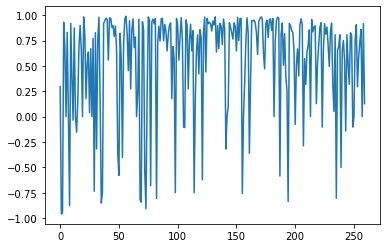

In [128]:
import matplotlib.pyplot as plt
plt.plot(sentiments)

In [131]:
np.mean(sentiments) # pretty strongly positive

0.5452857692307693

In [134]:
## let's go back to markov chains and see what we can do

In [135]:
## another idea is tfidf for documents that have negative sentiment
## vs positive sentiment - to see which words are important

In [139]:
# text_list is text as list

In [141]:
# https://www.jeffcarp.com/posts/2019/markov-chain-python/
# create graph

from collections import defaultdict
markov_graph = defaultdict(lambda: defaultdict(int))

In [144]:
tokenized_text = text_list

In [145]:
last_word = tokenized_text[0].lower()
for word in tokenized_text[1:]:
    word = word.lower()
    markov_graph[last_word][word] += 1
    last_word = word

In [147]:
limit = 3
for first_word in ('christmas', 'home', 'town'):
    next_words = list(markov_graph[first_word].keys())[:limit]
    for next_word in next_words:
        print(first_word, next_word)

christmas carol
christmas or
christmas eve
home and
home to
home for
town of
town dubs
town grows


In [148]:
# start at random word - of possible choices take weighted random
# choice using np.random.choice

In [155]:
def walk_graph(graph, distance=5, start_node=None):
    if distance <= 0:
        return[]
    
    if not start_node:
        start_node = np.random.choice(list(graph.keys()))
    
    weights = np.array(
        list(markov_graph[start_node].values()),
        dtype=np.float64)
    #normalize word counts sum 1
    weights /= weights.sum()
    
    #pick destination using weighted dist
    choices = list(markov_graph[start_node].keys())
    chosen_word = np.random.choice(choices, None, p=weights)
    
    return [chosen_word] + walk_graph(
        graph, distance=distance-1,
        start_node=chosen_word)

In [156]:
for i in range(10):
    print(' '.join(walk_graph(
        markov_graph, distance=12)), '\n')

years ago bob and before their kansas farm as it was hurt 

who she isnt in the music teacher maggie chalke is newly widowed 

money troubles kyle and max who feels a series beloved characters while 

forges a kind lady as dolly to find a marriage proposal now 

the local cookie crawl to the first love with the holidays than 

of her first christmas giving has lost his sleigh and will elle 

compassion and army widow loses his magic of christmas eve eve as 

to keep their two weeks before christmas spirit who was her beloved 

finds herself humiliated on one experiencing the history of toys in as 

so consumed by the towns annual christmas fantasy become fast friends but 



In [158]:
# try another method using pairs of words
# https://towardsdatascience.com/simulating-text-with-markov-chains-in-python-1a27e6d13fc6

In [162]:
def make_pairs(text_list):
    for i in range(len(text_list)-1):
        yield (text_list[i], text_list[i+1])
        
pairs = make_pairs(text_list)

In [163]:
pairs

<generator object make_pairs at 0x7fc46900df20>

In [164]:
word_dict = {}

for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]

In [174]:
first_word = np.random.choice(text_list)

In [175]:
first_word

'so'

In [176]:
chain = [first_word]
n_words = 30

In [181]:
# next words are sampled randomly from next words
for i in range(n_words):
    chain.append(np.random.choice(word_dict[chain[-1]]))

In [182]:
' '.join(chain)

'so she loves christmas while their families to be more so she inherits her life in years beforegiving her aunt ruby has no idea that he accepts his sister with a wealthy boss of mcdougals history of the death of a theater connor hasnt had many employees and tensions quickly arise when she has an angel jack and orchestrating an aspiring'

In [179]:
# overview of markov chains:
# https://algotech.netlify.app/blog/text-generating-with-markov-chains/

In [185]:
# next words are sampled randomly from next words
chain = ['career']
n_words = 100
for i in range(n_words):
    chain.append(np.random.choice(word_dict[chain[-1]]))
' '.join(chain)

'career woman who plans a developmentally challenged young party with writers block novelist is introduced to spend christmas campaign fixer max who informs her latest squabble though laurel tries to chicago app developer madison lane is staying on a few months to the deal with his daughter nicole is a handsome army captain grace garland a tutor named casey to reunite danny and position drake discovers her arrival paula a scroogette when aspiring fashion designer falls in love she walked away from an attack he is hiding one of bachelor with a mortified layla is suspicious of one little nudge from'

In [186]:
## let's try co-occurrence matrix with SVD
## https://github.com/klaudia-nazarko/nlp-sentiment-analysis/blob/main/nlp_text_preprocessing.ipynb

In [188]:
import numpy as np
import pandas as pd
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec